## Import Libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold

## Dataset

In [ ]:
diabetes_dataset = pd.read_csv('/data/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabet_data = diabetes_dataset.to_numpy()


EDA

In [ ]:
diabetes_dataset.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There is no missing values in the dataset

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


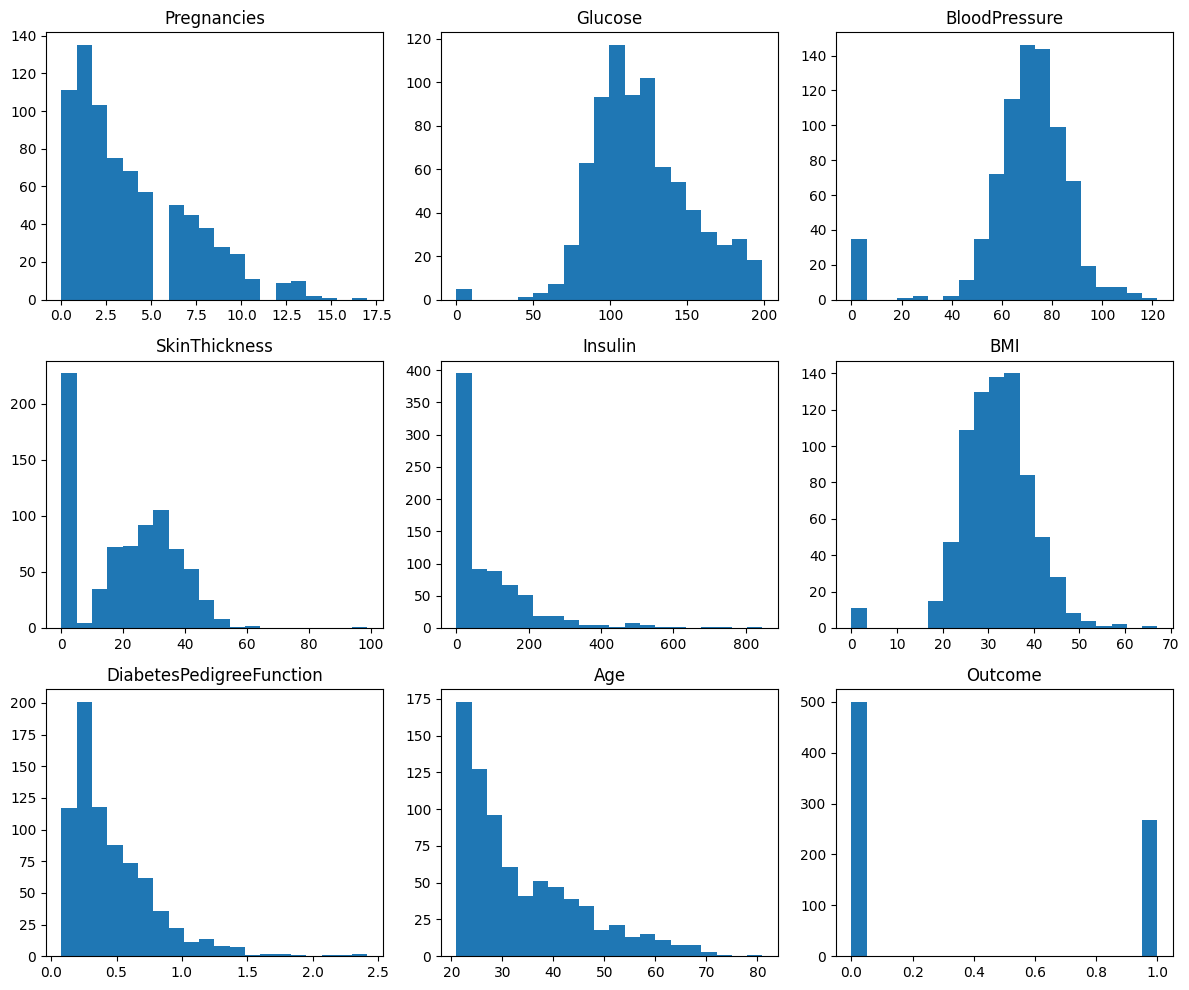

In [ ]:

diabetes_dataset.hist(figsize = (12,10),grid = False,bins = 20)
plt.tight_layout()
plt.show()


In [ ]:
diabetes_dataset.corr()['Outcome'].sort_values(ascending = False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


<Axes: >

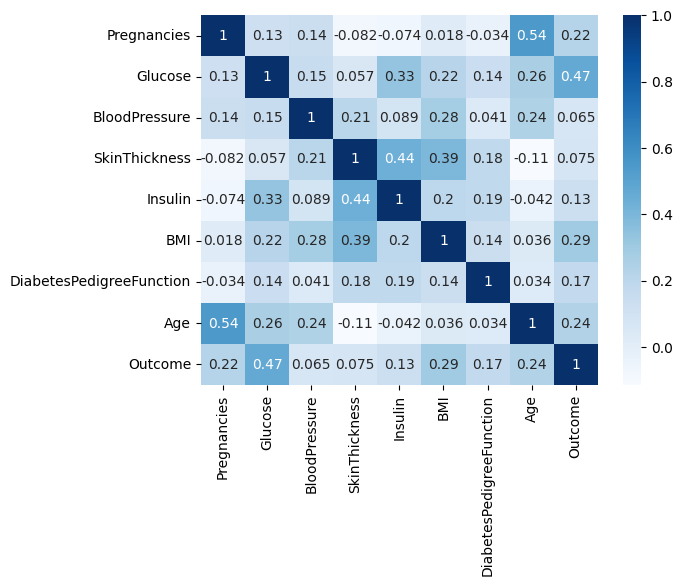

In [ ]:
import seaborn as sns
sns.heatmap(diabetes_dataset.corr(),annot=True, cmap = 'Blues')

Diabetes outcome is closely related with Glucose label, Nonetheless, no other features even glucose is not so closely related with diabetes outcome.


In [ ]:
X = diabetes_dataset.drop('Outcome',axis = 1)
y = diabetes_dataset['Outcome']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42, stratify=y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])


## Define a model parameter grid to search over

In [ ]:
param_grid = {
    'pca__n_components': [2, 3, 4],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

## Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## Determine the best parameters

In [ ]:
best_model = GridSearchCV(estimator = pipeline,
                          param_grid= param_grid,
                          cv = cv,
                          scoring='accuracy',
                          verbose = 2)

In [ ]:
cv,best_model

(StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('pca', PCA(n_components=2)),
                                        ('classifier', LogisticRegression())]),
              param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'pca__n_components': [2, 3, 4]},
              scoring='accuracy', verbose=2))

In [ ]:
best_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...........classifier__C=0.001, pca__n_components=2; total time=   0.1s
[CV] END ...........classifier__C=0.001, pca__n_components=2; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=2; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=2; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=2; total time=   0.1s
[CV] END ...........classifier__C=0.001, pca__n_components=3; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=3; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=3; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=3; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=3; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_components=4; total time=   0.0s
[CV] END ...........classifier__C=0.001, pca__n_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=2)

In [ ]:
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.6753246753246753


In [ ]:
best_model.best_params_

{'classifier__C': 0.01, 'pca__n_components': 4}

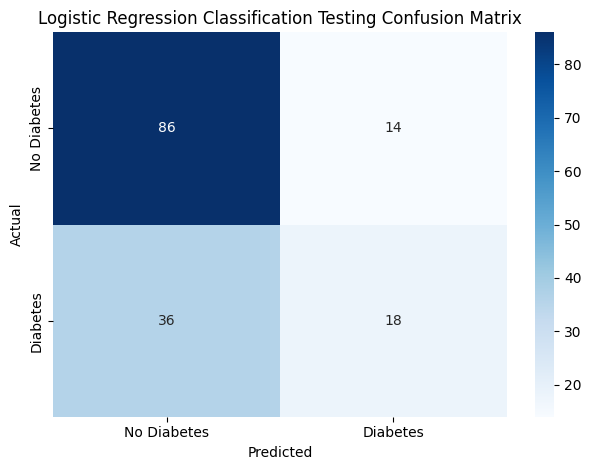

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['No Diabetes', 'Diabetes']
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])

In [ ]:
param_grid = {'pca__n_components': [2,3],
             'knn__n_neighbors': [3,5,7]}

In [ ]:
knn__model = GridSearchCV(estimator = pipeline,
                          param_grid= param_grid,
                          cv = cv,
                          scoring='accuracy',
                          verbose = 2)

In [ ]:
knn__model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

In [ ]:
test_score = knn__model.score(X_test, y_test)
print(f"Test Score: {test_score}")

Test Score: 0.6948051948051948


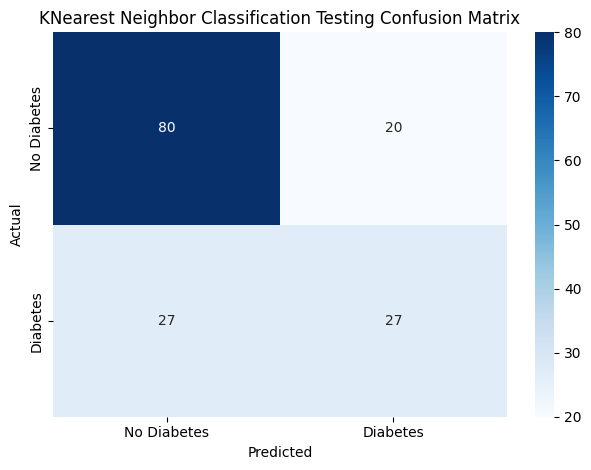

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = ['No Diabetes', 'Diabetes']
y_pred = knn__model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('KNearest Neighbor Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# Random Forest Model Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rf', RandomForestClassifier())
])

param_grid = {'pca__n_components': [2,3],
             'rf__n_estimators': [10,50,100]}

random_forest_model = GridSearchCV(estimator = pipeline,
                          param_grid= param_grid,
                          cv = cv,
                          scoring='accuracy',
                          verbose = 2)

random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...........pca__n_components=2, rf__n_estimators=10; total time=   0.0s
[CV] END ...........pca__n_components=2, rf__n_estimators=10; total time=   0.0s
[CV] END ...........pca__n_components=2, rf__n_estimators=10; total time=   0.0s
[CV] END ...........pca__n_components=2, rf__n_estimators=10; total time=   0.0s
[CV] END ...........pca__n_components=2, rf__n_estimators=10; total time=   0.0s
[CV] END ...........pca__n_components=2, rf__n_estimators=50; total time=   0.1s
[CV] END ...........pca__n_components=2, rf__n_estimators=50; total time=   0.1s
[CV] END ...........pca__n_components=2, rf__n_estimators=50; total time=   0.1s
[CV] END ...........pca__n_components=2, rf__n_estimators=50; total time=   0.1s
[CV] END ...........pca__n_components=2, rf__n_estimators=50; total time=   0.1s
[CV] END ..........pca__n_components=2, rf__n_estimators=100; total time=   0.1s
[CV] END ..........pca__n_components=2, rf__n_est

0.7077922077922078

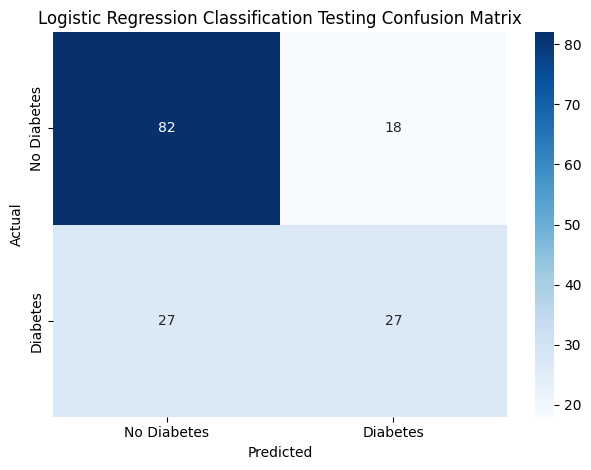

In [ ]:
y_pred = random_forest_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('xgb', XGBClassifier())
])

param_grid = {'pca__n_components': [2,3],
             'xgb__n_estimators': [10,50,100]}

xgb_model = GridSearchCV(estimator = pipeline,
                          param_grid= param_grid,
                          cv = cv,
                          scoring='accuracy',
                          verbose = 2)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........pca__n_components=2, xgb__n_estimators=10; total time=   0.1s
[CV] END ..........pca__n_components=2, xgb__n_estimators=10; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=10; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=10; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=10; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=50; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=50; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=50; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=50; total time=   0.0s
[CV] END ..........pca__n_components=2, xgb__n_estimators=50; total time=   0.0s
[CV] END .........pca__n_components=2, xgb__n_estimators=100; total time=   0.0s
[CV] END .........pca__n_components=2, xgb__n_est

0.6818181818181818

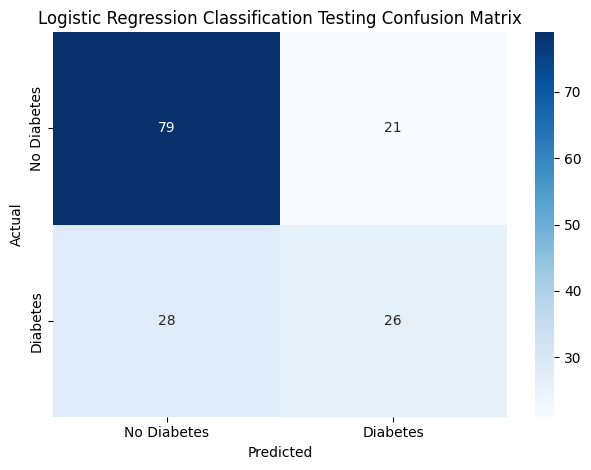

In [ ]:
y_pred = xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Logistic Regression Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
